# Modified National Institute of Standards and Technology Dataset
# exploratory analysis

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
from sklearn import datasets
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pydot
# Useful for separating train / test data
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import label_binarize
%matplotlib inline
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.neural_network import MLPClassifier
import sklearn.datasets as datasets
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [7]:
mnist = fetch_mldata("MNIST original")

70000

In [12]:
mnist.data.shape

(70000, 784)

In [13]:
mnist.target.shape

(70000,)

### explore one number

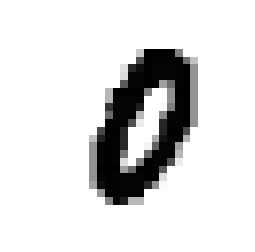

In [16]:
X_label, y_label = mnist["data"], mnist["target"]
digit = X_label[2]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

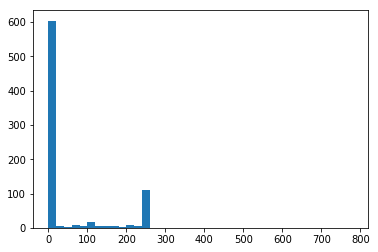

In [31]:
digit = X_label[2]
plt.hist(digit, bins=range(0,800,20))

plt.show()

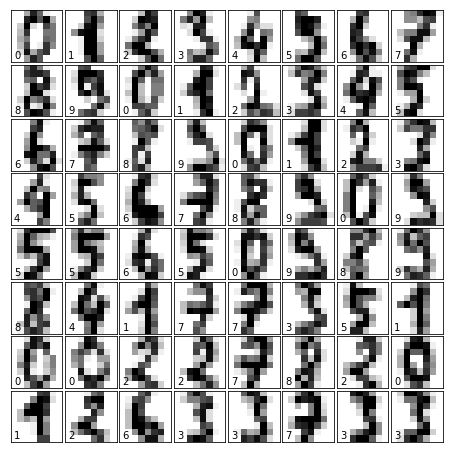

In [59]:
digits = datasets.load_digits()
digits.images.shape

# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# Show the plot
plt.show()

# Decision Tree

In [4]:
mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [65]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
y_train

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [71]:
tree.predict(X_train)

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [72]:
accuracy_score(y_test,tree.predict(X_test))*100

87.72999999999999

In [75]:
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,  
                    feature_names=range(0,784),  
                    special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png())  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Neural Network

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32212731
Iteration 2, loss = 0.15738787
Iteration 3, loss = 0.11647274
Iteration 4, loss = 0.09631113
Iteration 5, loss = 0.08074513
Iteration 6, loss = 0.07163224
Iteration 7, loss = 0.06351392
Iteration 8, loss = 0.05694146
Iteration 9, loss = 0.05213487
Iteration 10, loss = 0.04708320
Training set score: 0.985733
Test set score: 0.971000


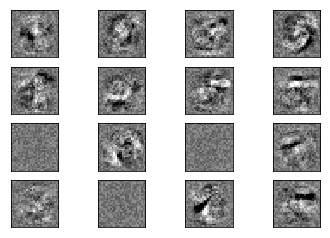

In [2]:
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
#                     solver='sgd', verbose=10, tol=1e-4, random_state=1)
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# Boosting

# Gradient boosting Classifier

In [78]:
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train,y_train)
gradient_output = clf.predict(X_test)  
print(accuracy_score(y_test, gradient_output))

0.6576


# Random Forest

In [28]:
forest = RandomForestClassifier(n_estimators = 500)
forest = forest.fit(X_train,y_train)
forest_output = forest.predict(X_test)
print("Random Forest with n_estimators:500")
print(accuracy_score(y_test, forest_output))

#forest = RandomForestClassifier(n_estimators = 5000)
#forest = forest.fit(X_train,y_train)
#forest_output = forest.predict(X_test)
#print("Random Forest with n_estimators:5000")
#print(accuracy_score(y_test, forest_output))

Random Forest with n_estimators:500
0.9713


# SVM

In [82]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
accuracy_score(y_test, clf.predict(X_test))

0.94040000000000001

In [ ]:
clf = SVC(kernel='sigmoid', gamma=10)
clf.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, clf.predict(X_test))

# KNN

In [ ]:
myList = list(range(1,200,2))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [6]:
# I got three cv scores after three hours of computing 
cv_scores

[0.97053297497989932, 0.97111638343685558, 0.97004979142912917]

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
accuracy_score(y_test, knn.predict(X_test))

0.96879999999999999

In [25]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [26]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [27]:
accuracy_score(y_test, knn.predict(X_test))

0.96940000000000004